# importing libraries

In [1]:
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import statistics

In [2]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn import preprocessing

In [3]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# importing data

In [4]:
df=pd.read_csv("responses.csv")

In [5]:
df.head(1)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats


In [6]:
df.columns

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', length=150)

# function_box

In [7]:
def replacer_mean(dff):
    r0=np.mean(df1)
    r1=r0.index
    r2=r0.values
    for i in np.arange(len(r1)):
          ri=r1[i]
          rv=r2[i]
          dff[ri].fillna(value=rv)
          dff.replace([np.inf,-np.inf],rv)
    return(dff)

In [8]:
def nan_remover(v,vm):
    vr=[]
    for i in np.arange(len(v)):
        if str(v[i])=="nan":
            vr=np.append(vr,vm)
        else:
            vr=np.append(vr,v[i])
    return(vr)

In [9]:
def replacer_mean(dff):
    dff1=dff
    r0=np.mean(dff)
    r1=r0.index
    r2=r0.values
    for i in np.arange(len(r1)):
          ri=r1[i]
          rv=r2[i]
          dff1[ri].fillna(value=rv)
          dff1[ri]=(nan_remover(dff[ri].values,rv))
    return(dff1)

In [10]:
def numriser(a):
    a1=[]
    for i in np.arange(len(a)):
        a1=np.append(a1,round(a[i]))
    return(a1)

In [11]:
def pie_plotter(var):
    dfm=pd.get_dummies(df[var])
    sm=(dfm.sum())
    #plt.subplot(2, 1, 1)
    #sm.plot(kind="pie",figsize=(10,10),fontsize=10,title=var,table=True)
    #plt.subplot(2, 1, 2)
    df1[var].plot(figsize=(10,10),kind="kde")

In [12]:
def bi_var(var1,var2,dff):

    sns.lmplot(var1,var2,dff,order=1,scatter=False,
           scatter_kws={"marker":"o","color":"red"},
              line_kws={"linewidth":1,"color":"blue"})
    r=np.corrcoef(dff[var1],dff[var2])[0,1]
    print("correlation_coef between",var1,"and",var2,"is",r)

In [13]:
def counter(m):
    u=[1,2,3,4,5]
    n=len(m)
    s1=[]
    for i in u:
        s=0
        for j in np.arange(n):
            if i==m[j]:
                s=s+1
        s1=np.append(s1,s)
    return(s1)

In [14]:
def counter2(m):
    u=np.unique(m)
    n=len(m)
    s1=[]
    for i in u:
        s=0
        for j in np.arange(n):
            if i==m[j]:
                s=s+1
        s1=np.append(s1,s)
    s11=DataFrame(s1,index=u).T
    return(s11)

In [134]:
def dpie_plotter(var,al):
    labels1=np.unique(df_r[al])
    labels=labels1[::-1] 
    dfm=pd.get_dummies(df1[var],columns=labels)
    sm=(dfm.sum())
    plt.subplot(2, 1, 1)
    sm.plot(kind="pie",figsize=(10,10),fontsize=10,title="Training data set",table=True,autopct='%1.1f%%')
    plt.subplot(2, 1, 2)
    dfm=pd.get_dummies(df_r2[var],columns=labels)
    sm1=(dfm.sum())
    sm1.plot(kind="pie",figsize=(10,10),fontsize=10,title="Response data set",table=True,autopct='%1.1f%%')
    plt.legend(labels, loc="best")

# subsetting_data

In [271]:
y=df["Happiness in life"]

In [272]:
df1=df[["Dance","Shopping","Fun with friends","Parents' advice","Eating to survive",
    "Pets","Darkness","Fear of public speaking","Smoking","Alcohol","Economy Management","Healthy eating",
        "Decision making","Workaholism","Friends versus money","Loneliness",
   "God","Dreams","Number of friends","Socializing","Entertainment spending","Age","Height","Weight",
   "Gender","Only child","Village - town","Internet usage"]]

In [273]:
df1.head(1)

,Dance,Shopping,Fun with friends,Parents' advice,Eating to survive,Pets,Darkness,Fear of public speaking,Smoking,Alcohol,...,Number of friends,Socializing,Entertainment spending,Age,Height,Weight,Gender,Only child,Village - town,Internet usage
0,2.0,4.0,5.0,4.0,1,4.0,1.0,2.0,never smoked,drink a lot,...,3,3.0,3.0,20.0,163.0,48.0,female,no,village,few hours a day


In [274]:
df_music=(df[df.columns[0:19]])
music=numriser(np.mean(df_music.T))
df_movies=(df[df.columns[19:33]])
movies=numriser(np.mean(df_movies.T))

edu=[]
for i in (df["Education"].values):
    if i=="secondary school":
        edu=np.append(edu,1)
    elif i=="masters degree":
        edu=np.append(edu,2)
    elif i=="college/bachelor degree":
        edu=np.append(edu,3)
    elif i=="doctorate degree":
        edu=np.append(edu,4)
    else:
        edu=np.append(edu,5)

In [275]:
a7=[]
for i in np.arange(len(df1["Height"])):
    a17=df1["Height"][i]/df1["Weight"][i]
    a7=np.append(a7,a17)

from sklearn import preprocessing
sc=preprocessing.MinMaxScaler(feature_range=(1,5))
a8=sc.fit_transform(df1["Age"].values.reshape(-1,1))

a1=[]
for i in df1["Gender"].values:
    if i=="female":
        a1=np.append(a1,0)
    else:
        a1=np.append(a1,1)

a2=[]
for i in df1["Only child"].values:
    if i=="no":
        a2=np.append(a2,0)
    else :
        a2=np.append(a2,1)

a3=[]
for i in df1["Village - town"].values:
    if i=="village":
        a3=np.append(a3,1)
    else:
        a3=np.append(a3,0)

a4=[]
for i in df1["Internet usage"].values:
    if i=="few hours a day":
        a4=np.append(a4,0)
    elif i=="less than an hour a day":
        a4=np.append(a4,1)
    else :
        a4=np.append(a4,2)

a5=[]
for i in df1["Smoking"].values:
    if i=="never smoked":
        a5=np.append(a5,0)
    elif i=="tried smoking":
        a5=np.append(a5,1)
    elif i=="former smoker":
        a5=np.append(a5,2)
    else:
        a5=np.append(a5,3)

a6=[]
for i in df1["Alcohol"]:
    if i=="drink a lot":
        a6=np.append(a6,0)
    elif i=="social drinker":
        a6=np.append(a6,1)
    else:
        a6=np.append(a6,2)

df1["hw_rat"]=a7
df1["age"]=a8
df1["gender"]=a1
df1["alcohol"]=a6
df1["smoke"]=a5
df1["only_child"]=a2
df1["area"]=a3
df1["internet"]=a4
df1["music"]=music
df1["movie"]=movies
df1["education"]=edu

df1=df1.drop(["Height","Weight","Age","Gender","Only child","Internet usage","Smoking","Village - town","Alcohol"],axis=1)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

# deleaing with NA and nan values

In [276]:
dfy=DataFrame(y)
dfy=dfy.fillna(value=np.mean(y))
dfy=DataFrame(nan_remover(dfy["Happiness in life"].values,np.mean(y)))

In [277]:
r0=(np.mean(df1))
r1=r0.index
r2=r0.values

In [278]:
df2=df1
df1=replacer_mean(df2)

In [279]:
(df1.columns)

Index(['Dance', 'Shopping', 'Fun with friends', 'Parents' advice',
       'Eating to survive', 'Pets', 'Darkness', 'Fear of public speaking',
       'Economy Management', 'Healthy eating', 'Decision making',
       'Workaholism', 'Friends versus money', 'Loneliness', 'God', 'Dreams',
       'Number of friends', 'Socializing', 'Entertainment spending', 'hw_rat',
       'age', 'gender', 'alcohol', 'smoke', 'only_child', 'area', 'internet',
       'music', 'movie', 'education'],
      dtype='object')

# EDA

In [25]:
#univariate_data_analysis

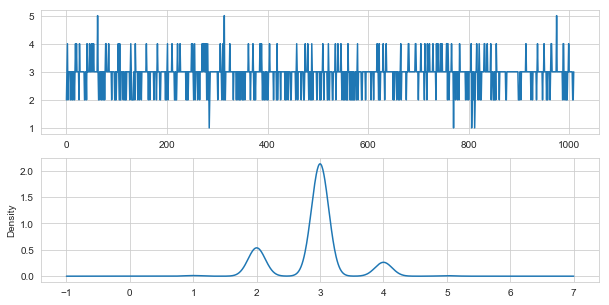

In [26]:
plt.subplot(2, 1, 1)
df1["music"].plot(figsize=(15,5))
#df1["Music"].plot(figsize=(10,5),kind="kde")
plt.subplot(2, 1, 2)
df1["music"].plot(figsize=(10,5),kind="kde")

In [26]:
#df1["gender"].plot(kind="pie")
g1=(sum((pd.get_dummies(df1["gender"]))[0.0]),sum((pd.get_dummies(df1["gender"]))[1.0]))
g1

(593, 417)

([<matplotlib.patches.Wedge at 0x25e96bb8a90>,
 [Text(-0.5298224636856754, 1.8870315728609421, 'male'),
  Text(0.5568542220369848, -1.9833086939252762, 'female')])

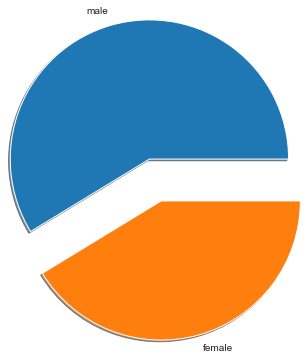

In [27]:
plt.pie(g1,labels=["male","female"],radius=1.6,shadow=True,explode=[.2,.3])


Text(0, 0.5, 'frequency')

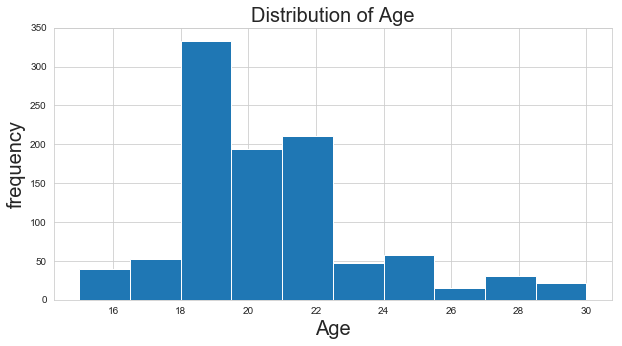

In [28]:
df["Age"].plot(kind="hist",figsize=(10,5))
plt.title("Distribution of Age",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("frequency",fontsize=20)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence fo

Text(0, 0.5, 'frequency')

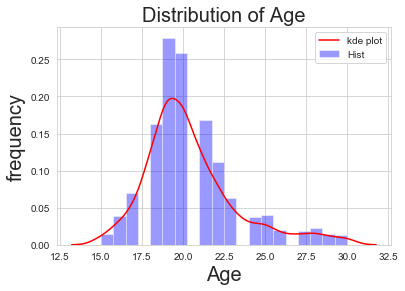

In [111]:
sns.distplot(df["Age"].values,bins=20,
              kde_kws={"color":"red","label":"kde plot"},
              hist_kws={"color":"blue","label":"Hist"})
plt.title("Distribution of Age",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("frequency",fontsize=20)

Text(0, 0.5, 'frequency')

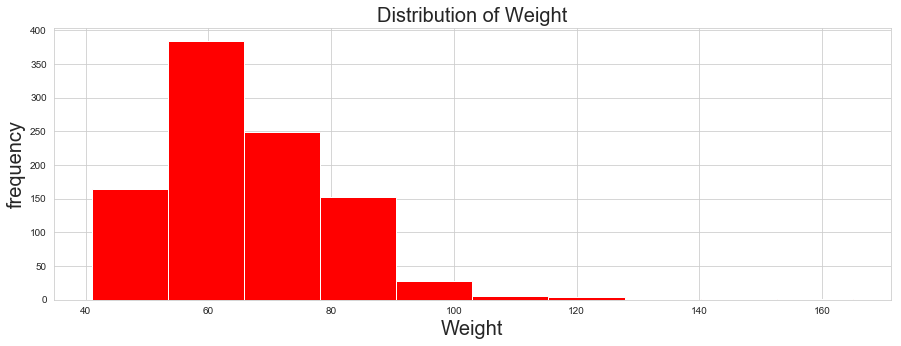

In [112]:
df["Weight"].plot(kind="hist",figsize=(15,5),color="red")
plt.title("Distribution of Weight",fontsize=20)
plt.xlabel("Weight",fontsize=20)
plt.ylabel("frequency",fontsize=20)

Text(0, 0.5, 'frequency')

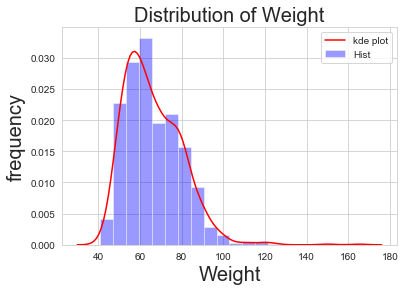

In [113]:
sns.distplot(df["Weight"].values,bins=20,
              kde_kws={"color":"red","label":"kde plot"},
              hist_kws={"color":"blue","label":"Hist"})
plt.title("Distribution of Weight",fontsize=20)
plt.xlabel("Weight",fontsize=20)
plt.ylabel("frequency",fontsize=20)

In [114]:
df1.columns

Index(['Dance', 'Shopping', 'Fun with friends', 'Parents' advice',
       'Eating to survive', 'Pets', 'Darkness', 'Fear of public speaking',
       'Economy Management', 'Healthy eating', 'Decision making',
       'Workaholism', 'Friends versus money', 'Loneliness', 'God', 'Dreams',
       'Number of friends', 'Socializing', 'Entertainment spending', 'hw_rat',
       'age', 'gender', 'alcohol', 'smoke', 'only_child', 'area', 'internet',
       'music', 'movie', 'education'],
      dtype='object')

In [115]:
g1=(sum((pd.get_dummies(df1["only_child"]))[0.0]),sum((pd.get_dummies(df1["only_child"]))[1.0]))
g1

(754, 256)

([<matplotlib.patches.Wedge at 0x24a66a3cb70>,
 [Text(-1.3707592183176605, 1.4009351039206481, 'more_than_one_child'),
  Text(1.3008225235055342, -1.3294588231083708, 'only_child')])

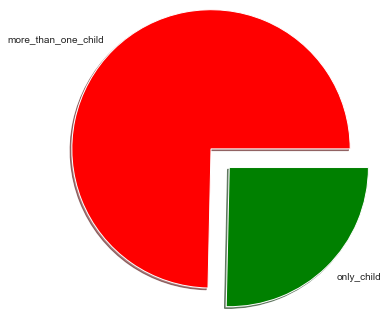

In [116]:
plt.pie(g1,labels=["more_than_one_child","only_child"],radius=1.6,shadow=True,explode=[.2,.1],colors="rgba")

([<matplotlib.patches.Wedge at 0x1e66de5b588>,
 [Text(1.7234790313073296, 1.3020061553786717, 'current smoker'),
  Text(-1.6231957666996397, 0.9082045490793194, 'former smoker'),
  Text(-0.38760778614927693, -1.9212912855984272, 'never smoked'),
  Text(1.6033980278524518, -1.1272598477187366, 'tried smoking')])

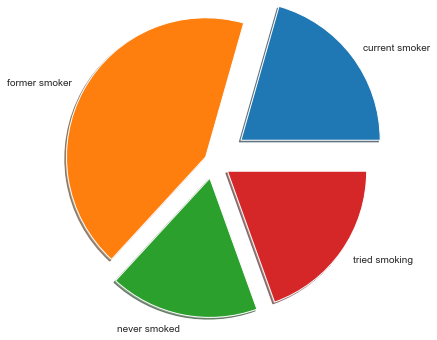

In [226]:
n=23
m1=df1["smoke"].values
#print(col[n])
g1=counter2(m1)
g1.values[0]
plt.pie(g1.values[0],labels=["current smoker", "former smoker", "never smoked", "tried smoking"],radius=1.6,shadow=True,explode=[.4,.1,.2,.2])

In [134]:
set(df["Smoking"].values)

{'current smoker', 'former smoker', nan, 'never smoked', 'tried smoking'}

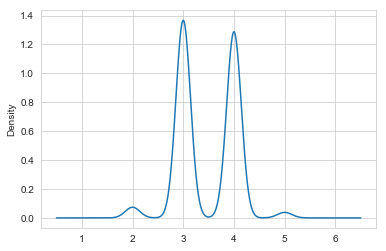

In [154]:
df1["movie"].plot(kind="kde")

In [32]:
#bivariate_data_analysis

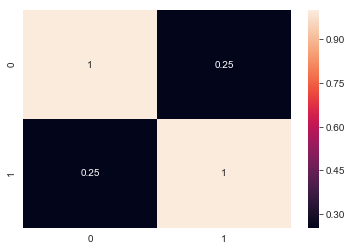

In [159]:
sns.heatmap(np.corrcoef(df1["music"].values,df1["Dance"].values),annot=True)

In [161]:
np.corrcoef(df1["music"],df1["movie"])[0,1]

0.242489271251023

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


correlation_coef between music and Dance is 0.2529677832338564


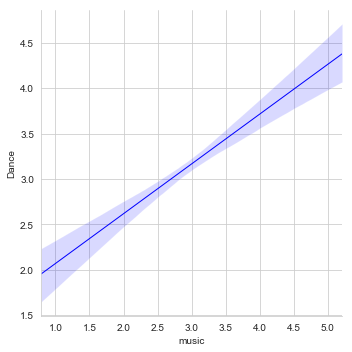

In [162]:
bi_var("music","Dance",df1)

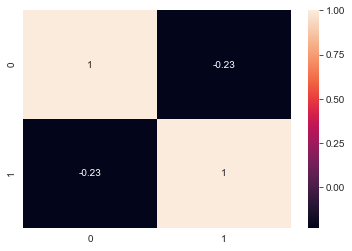

In [160]:
sns.heatmap(np.corrcoef(df1["age"].values,df1["hw_rat"].values),annot=True)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


correlation_coef between age and hw_rat is -0.22989488360607824


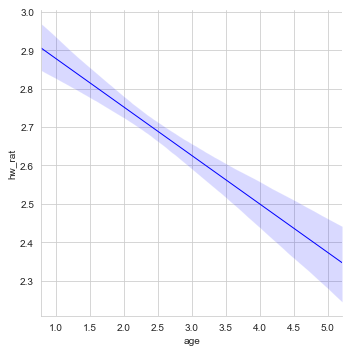

In [161]:
bi_var("age","hw_rat",df1)

correlation_coef between God and Dreams is 0.03449424842335759


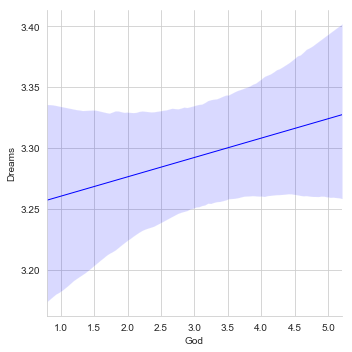

In [36]:
bi_var("God","Dreams",df1)

In [37]:
#multivariate

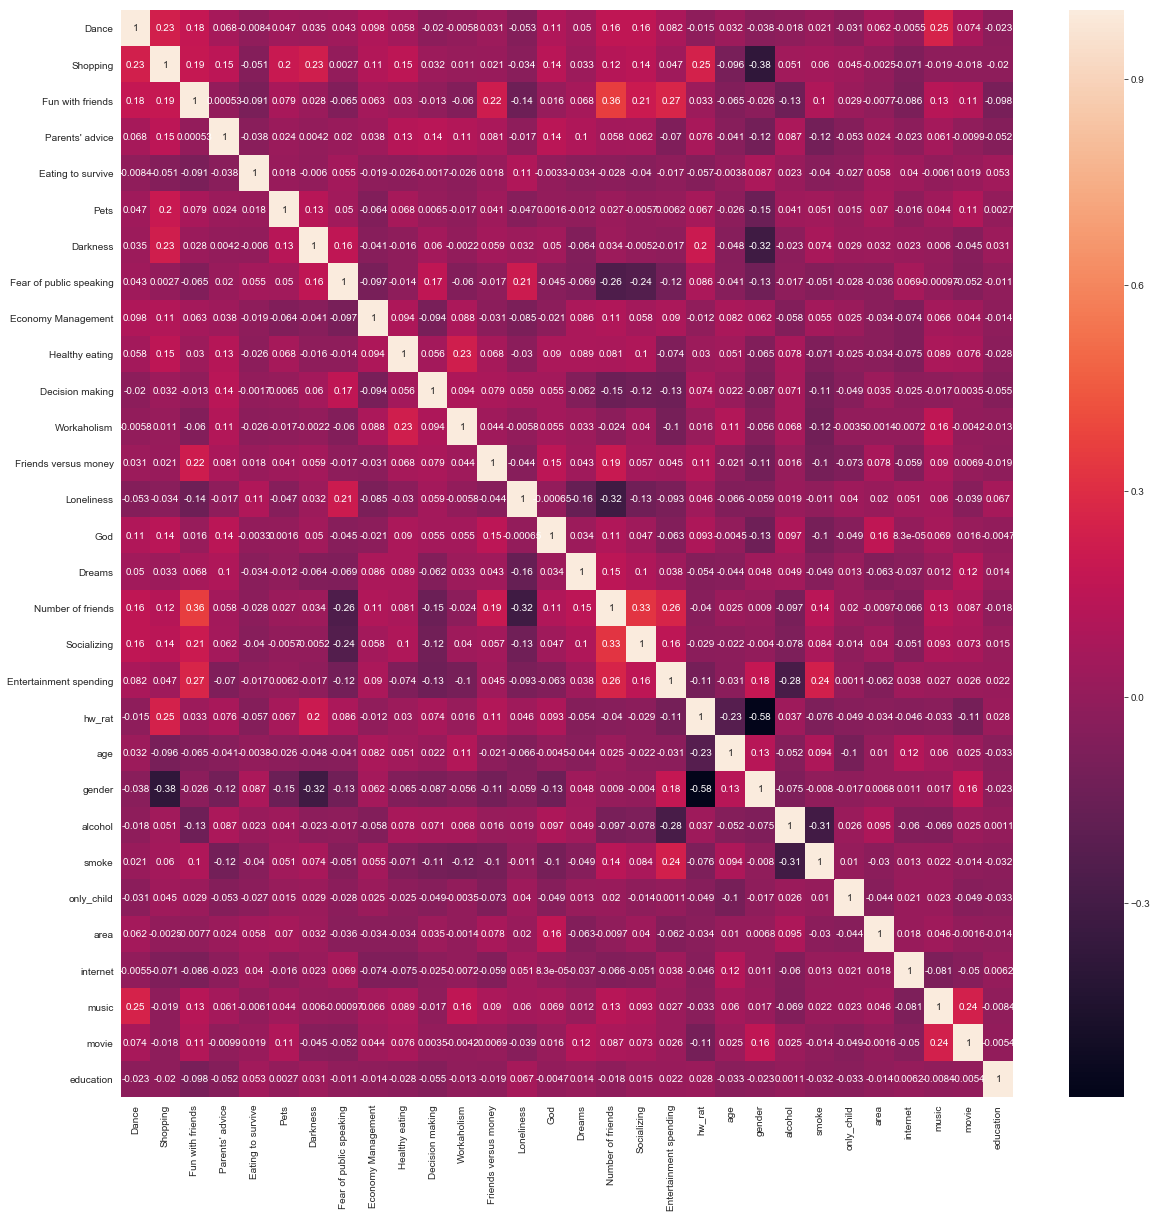

In [163]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

In [163]:
col=df1.columns

In [176]:
n=22
m1=df1[col[n]].values
print(col[n])
(counter2(m1))

gender


,0.0,1.0
0,593.0,417.0


In [171]:
n=23
m1=df1[col[n]].values
print(col[n])
counter2(m1)

alcohol


,1.0,2.0,3.0
0,129.0,659.0,222.0


In [172]:
n=24
m1=df1[col[n]].values
print(col[n])
counter2(m1)

smoke


,0.0,1.0,2.0,3.0
0,208.0,430.0,175.0,197.0


In [201]:
m2=[]
for i in np.arange(20):
     nm=df1.columns[i]
     m1=df1[nm].values
     m2=np.append(m2,counter(m1)) 
df_pivot=DataFrame(m2.reshape(20,5),index=df1.columns[0:20])
df_pivot

,0,1,2,3,4
Music,9.0,11.0,36.0,129.0,822.0
Slow songs or fast songs,23.0,66.0,580.0,235.0,104.0
Dance,94.0,215.0,321.0,235.0,141.0
Movies,3.0,10.0,75.0,196.0,720.0
Romantic,63.0,157.0,275.0,248.0,264.0
Documentary,43.0,123.0,258.0,302.0,276.0
Shopping,103.0,197.0,252.0,230.0,226.0
Fun with friends,0.0,23.0,80.0,216.0,687.0
Pets,206.0,118.0,167.0,163.0,352.0
Darkness,358.0,301.0,165.0,106.0,78.0


# fitting_and_model_assignment

In [24]:
x1=df1.values

In [25]:
y1=dfy.values

In [26]:
from sklearn.linear_model import LogisticRegression
model_lo=LogisticRegression()
y2=[]
for i in np.arange(len(y1)):
    if (y1[i]<2.5):
        y2=np.append(y2,1)
    elif (y1[i]>3.5):
        y2=np.append(y2,3)
    else:
        y2=np.append(y2,2)
model_lo.fit(y1,y2)
y1_pre=model_lo.predict(y1)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [27]:
accuracy_score(y2,y1_pre)

0.9415841584158415

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


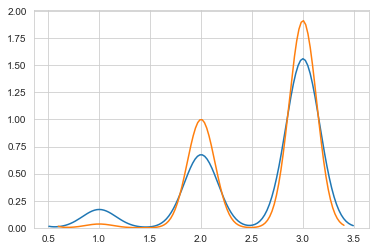

In [28]:
sns.kdeplot(y2)
sns.kdeplot(y1_pre)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x1,y2,test_size=0.33,random_state=42)

In [30]:
model_xg=xgb.XGBClassifier()

In [31]:
model_xg=xgb.XGBClassifier(base_score=0.5, 
                           booster='dart', 
                           colsample_bylevel=1,
                           colsample_bynode=1, 
                           colsample_bytree=.4,
                           gamma=0.2,
                           importance_type='gain', 
                           learning_rate=0.1, 
                           max_delta_step=0,
                           max_depth=2, min_child_weight=3, missing=None, n_estimators=100,
                           n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
                           reg_alpha=.2, reg_lambda=1, scale_pos_weight=1, seed=None,
                           silent=None, subsample=1, verbosity=1)

In [32]:
model_xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [33]:
y_pre=model_xg.predict(x_train)

In [34]:
accuracy_score(numriser(DataFrame(y_pre)[0].values),(numriser(DataFrame(y_train)[0].values)))

0.7588757396449705

In [35]:
y_pre1=model_xg.predict(x_test)

In [36]:
accuracy_score(numriser(DataFrame(y_pre1)[0].values),(numriser(DataFrame(y_test)[0].values)))

0.7035928143712575

In [37]:
df_pre1=DataFrame([numriser(DataFrame(y_pre1)[0].values),DataFrame(y_test)[0].values],index=["predicted","observed"]).T

In [39]:
df_pre1.head(2)

,predicted,observed
0,3.0,3.0
1,3.0,2.0


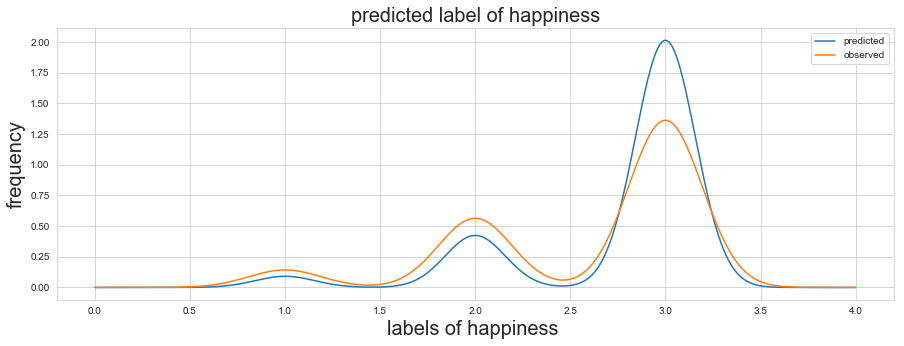

In [40]:
df_pre1["predicted"].plot(kind="kde",label=True,figsize=(15,5),alpha=1)
df_pre1["observed"].plot(kind="kde",label=True,figsize=(15,5),alpha=1)
plt.title("predicted label of happiness",fontsize=20)
plt.xlabel("labels of happiness ",fontsize=20)
plt.ylabel("frequency",fontsize=20)
plt.legend(["predicted","observed"])

# tuning_of_models

In [41]:
params={
    "learning_rate":[.1,.2,.3],
     "max_depth":[1,2,3,4,5],
      "min_child_weight":[2,3,4],
       "gamma": [.1,.2,.3,.4],
        "colsample_bytree":[.2,.4,.5,.8,1],           
         }

In [42]:
random_search=RandomizedSearchCV(model_xg,params)

In [43]:
random_search.fit(x_train,y_train)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [1, 2, 3, 4, 5], 'min_child_weight': [2, 3, 4], 'gamma': [0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.2, 0.4, 0.5, 0.8, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [44]:
random_search.best_params_

{'min_child_weight': 4,
 'max_depth': 2,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.8}

In [45]:
model_xg=xgb.XGBClassifier(base_score=0.5, 
                           booster='dart', 
                           colsample_bylevel=1,
                           colsample_bynode=1, 
                           colsample_bytree=.8,
                           gamma=0.4,
                           importance_type='gain', 
                           learning_rate=0.1, 
                           max_delta_step=0,
                           max_depth=1, min_child_weight=4, missing=None, n_estimators=100,
                           n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
                           reg_alpha=.2, reg_lambda=1, scale_pos_weight=1, seed=None,
                           silent=None, subsample=1, verbosity=1)
model_xg.fit(x_train,y_train)
y_pre=model_xg.predict(x_train)
accuracy_score(numriser(DataFrame(y_pre)[0].values),(numriser(DataFrame(y_train)[0].values)))
y_pre1=model_xg.predict(x_test)
accuracy_score(numriser(DataFrame(y_pre1)[0].values),(numriser(DataFrame(y_test)[0].values)))

0.6736526946107785

In [46]:
#before importing the resposnes data file one neads to train upon the whole data set

In [61]:
model_xg1=xgb.XGBClassifier(base_score=0.5, 
                           booster='dart', 
                           colsample_bylevel=1,
                           colsample_bynode=1, 
                           colsample_bytree=.4,
                           gamma=0.2,
                           importance_type='gain', 
                           learning_rate=0.1, 
                           max_delta_step=0,
                           max_depth=2, min_child_weight=3, missing=None, n_estimators=100,
                           n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
                           reg_alpha=.2, reg_lambda=1, scale_pos_weight=1, seed=None,
                           silent=None, subsample=1, verbosity=1)

In [62]:
model_xg1.fit(x1,y2)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [63]:
y_pre1=model_xg1.predict(x1)

In [68]:
accuracy_score(numriser(DataFrame(y_pre1)[0].values),(numriser(DataFrame(y2)[0].values)))

0.7366336633663366

In [69]:
df_pre1=DataFrame([numriser(DataFrame(y_pre1)[0].values),DataFrame(y2)[0].values],index=["predicted","observed"]).T

In [70]:
df_pre1

,predicted,observed
0,3.0,3.0
1,3.0,3.0
2,3.0,3.0
3,1.0,1.0
4,3.0,2.0
5,3.0,2.0
6,3.0,3.0
7,3.0,3.0
8,2.0,2.0
9,3.0,3.0


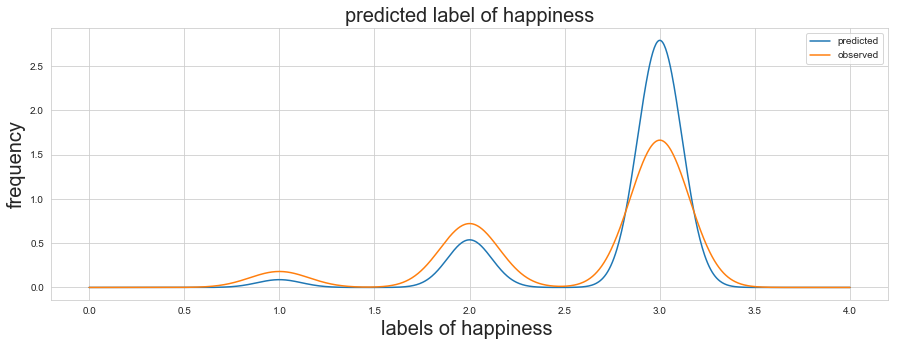

In [71]:
df_pre1["predicted"].plot(kind="kde",label=True,figsize=(15,5),alpha=1)
df_pre1["observed"].plot(kind="kde",label=True,figsize=(15,5),alpha=1)
plt.title("predicted label of happiness",fontsize=20)
plt.xlabel("labels of happiness ",fontsize=20)
plt.ylabel("frequency",fontsize=20)
plt.legend(["predicted","observed"])

# IMporting the response sheet now

In [308]:
df_r=pd.read_csv("Responses11.csv")

In [309]:
df_r.head(2)

,Timestamp,Name,"Comments about yourself (Hostel room number, Class, Department etc.)",Your email id,Age,Height (in feet),Weight (in kgs),Sex,Are you the only child of your parents?,Where did you spend most of you childhood?,...,How confident are you in taking important Decisions?,Are you a workaholic?,"Which one is more important, friends or money?",How lonely are you?,Your belief in God,How often do you see dreams?,Do you have a lot of close friends?,How much do you socialize with others ?,Level of your spending on Entertainment,Internet usage in a day.
0,06-03-2020 21:19,Bharat kurde,DST-CIMS,NaN,23.0,5.8,68,Male,No,City,...,4,4,2,3,5,5,2,3,3.0,More than an hour but less than 4 hours
1,06-03-2020 21:33,SHIVAM KUMAR GUPTA,M.sc STATISTICS & COMPUTING,NaN,21.0,5.3,56,Male,No,City,...,3,3,5,2,2,2,2,2,3.0,More than 4 hours


In [310]:
df_r1=df_r[["Timestamp","Name","Comments about yourself (Hostel room number, Class, Department etc.) ","Your email id"]]

In [311]:
df_r2=df_r.drop(["Timestamp","Name","Comments about yourself (Hostel room number, Class, Department etc.) ","Your email id"],axis=1)

In [312]:
df_r2.head(2)

,Age,Height (in feet),Weight (in kgs),Sex,Are you the only child of your parents?,Where did you spend most of you childhood?,Highest level of education attained?,Interest in Music.,Interest in Movies.,Interest in Dance.,...,How confident are you in taking important Decisions?,Are you a workaholic?,"Which one is more important, friends or money?",How lonely are you?,Your belief in God,How often do you see dreams?,Do you have a lot of close friends?,How much do you socialize with others ?,Level of your spending on Entertainment,Internet usage in a day.
0,23.0,5.8,68,Male,No,City,Masters degree,3,2,2,...,4,4,2,3,5,5,2,3,3.0,More than an hour but less than 4 hours
1,21.0,5.3,56,Male,No,City,Masters degree,4,4,4,...,3,3,5,2,2,2,2,2,3.0,More than 4 hours


In [313]:
h=[]
for i in np.arange(len(df_r2["Height (in feet)"])):
    h=np.append(h,(df_r2["Height (in feet)"][i]*30.48))

In [314]:
edu=[]
for i in (df_r2["Highest level of education attained?"].values):
    if i=="Secondary school":
        edu=np.append(edu,1)
    elif i=="Masters degree":
        edu=np.append(edu,2)
    elif i=="Secondary school":
        edu=np.append(edu,3)
    elif i=="Doctorate degree":
        edu=np.append(edu,4)
    else:
        edu=np.append(edu,5)

In [315]:
a7=[]
for i in np.arange(len(df_r2["Weight (in kgs)"])):
    a17=h[i]/df_r2["Weight (in kgs)"][i]
    a7=np.append(a7,a17)

from sklearn import preprocessing
sc=preprocessing.MinMaxScaler(feature_range=(1,5))
a8=sc.fit_transform(df_r2["Age"].values.reshape(-1,1))

a1=[]
for i in df_r2["Sex"].values:
    if i=="Female":
        a1=np.append(a1,0)
    else:
        a1=np.append(a1,1)

a2=[]
for i in df_r2["Are you the only child of your parents?"].values:
    if i=="No":
        a2=np.append(a2,0)
    else :
        a2=np.append(a2,1)

a3=[]
for i in df_r2["Where did you spend most of you childhood?"].values:
    if i=="Village":
        a3=np.append(a3,1)
    else:
        a3=np.append(a3,0)

a4=[]
for i in df_r2["Internet usage in a day."].values:
    if i=="More than an hour but less than 4 hours":
        a4=np.append(a4,0)
    elif i=="More than 4 hours":
        a4=np.append(a4,2)
    else :
        a4=np.append(a4,1)

a5=[]
for i in df_r2["Do you smoke?"].values:
    if i=="Never smoked":
        a5=np.append(a5,0)
    elif i=="Tried smoking":
        a5=np.append(a5,1)
    elif i=="Former smoker":
        a5=np.append(a5,2)
    else:
        a5=np.append(a5,3)

a6=[]
for i in df_r2["Level of alcohol consumption."]:
    if i=="Drink a lot":
        a6=np.append(a6,0)
    elif i=="Social drinker":
        a6=np.append(a6,1)
    else:
        a6=np.append(a6,2)

df_r2["hw_rat"]=a7
df_r2["age"]=a8
df_r2["gender"]=a1
df_r2["alcohol"]=a6
df_r2["smoke"]=a5
df_r2["only_child"]=a2
df_r2["area"]=a3
df_r2["internet"]=a4
df_r2["education"]=edu

df_r2=df_r2.drop(["Weight (in kgs)","Age","Sex","Are you the only child of your parents?","Internet usage in a day.","Do you smoke?","Where did you spend most of you childhood?","Level of alcohol consumption."],axis=1)

In [316]:
df_r2=df_r2.drop(["Highest level of education attained?"],axis=1)

In [317]:
df_r2=df_r2.drop(["Height (in feet)"],axis=1)

In [318]:
r0=(np.mean(df_r2))
r1=r0.index
r2=r0.values

In [319]:
df_r21=df_r2
df_r2=replacer_mean(df_r21)

In [320]:
df_r2.head(0)

,Interest in Music.,Interest in Movies.,Interest in Dance.,Interest in Shopping.,Fun with friends,How often do you listen to your parents' advice ?,What level of foodie you are?,Your affection toward pets,Fear of Darkness.,Fear of public speaking.,...,Level of your spending on Entertainment,hw_rat,age,gender,alcohol,smoke,only_child,area,internet,education


([<matplotlib.patches.Wedge at 0x24756630320>,
 [Text(0.3143415118818145, 1.8332455956330174, 'male'),
  Text(-0.3143413402409726, -1.8332456250637854, 'female')])

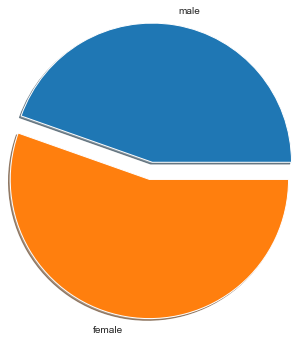

In [321]:
g1=(sum((pd.get_dummies(df_r2["gender"]))[0.0]),sum((pd.get_dummies(df_r2["gender"]))[1.0]))
plt.pie(g1,labels=["male","female"],radius=1.6,shadow=True,explode=[.1,.1])

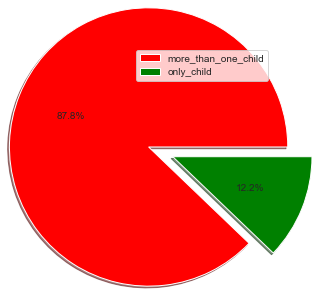

In [265]:
g1=(sum((pd.get_dummies(df_r2["only_child"]))[0.0]),sum((pd.get_dummies(df_r2["only_child"]))[1.0]))
labels=["more_than_one_child","only_child"]
pie=plt.pie(g1,radius=1.6,shadow=True,explode=[.2,.1],colors="rgba",autopct='%1.1f%%')
plt.legend(pie[0], labels, loc="best")

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'frequency')

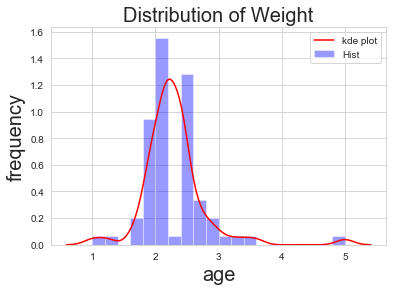

In [266]:
sns.distplot(df_r2["age"].values,bins=20,
              kde_kws={"color":"red","label":"kde plot"},
              hist_kws={"color":"blue","label":"Hist"})
plt.title("Distribution of Weight",fontsize=20)
plt.xlabel("age",fontsize=20)
plt.ylabel("frequency",fontsize=20)

Text(0, 0.5, 'frequency')

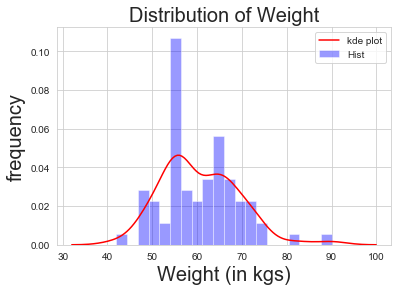

In [267]:
sns.distplot(df_r["Weight (in kgs)"].values,bins=20,
              kde_kws={"color":"red","label":"kde plot"},
              hist_kws={"color":"blue","label":"Hist"})
plt.title("Distribution of Weight",fontsize=20)
plt.xlabel("Weight (in kgs)",fontsize=20)
plt.ylabel("frequency",fontsize=20)

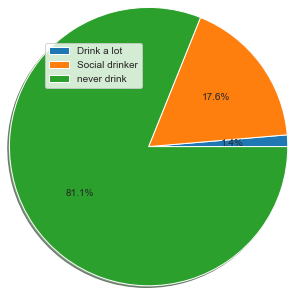

In [268]:
m1=df_r2["alcohol"].values
g1=counter2(m1)
g1.values[0]
labels=["Drink a lot", "Social drinker", "never drink"]
pie=plt.pie(g1.values[0],radius=1.6,shadow=True,autopct='%1.1f%%')
plt.legend(labels, loc="best")

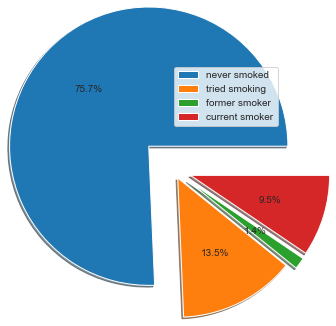

In [269]:
m1=df_r2["smoke"].values
g1=counter2(m1)
g1.values[0]
labels=["never smoked","tried smoking","former smoker","current smoker"]
pie=plt.pie(g1.values[0],radius=1.6,shadow=True,explode=[.4,.1,.2,.2],autopct='%1.1f%%',)
plt.legend(pie[0], labels, loc="best")

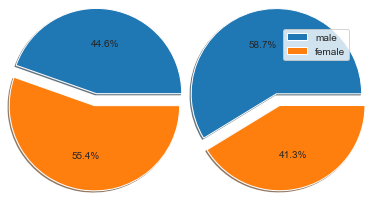

In [127]:
g1=(sum((pd.get_dummies(df_r2["gender"]))[0.0]),sum((pd.get_dummies(df_r2["gender"]))[1.0]))
g2=(sum((pd.get_dummies(df1["gender"]))[0.0]),sum((pd.get_dummies(df1["gender"]))[1.0]))
labels=["male","female"]
fig, (ax1, ax2) = plt.subplots(1,2)
pie=ax1.pie(g1,radius=1.4,shadow=True,explode=[.1,.1],autopct='%1.1f%%')
ax2.pie(g2,radius=1.4,shadow=True,explode=[.1,.1],autopct='%1.1f%%')
plt.legend(pie[0], labels, loc="best")

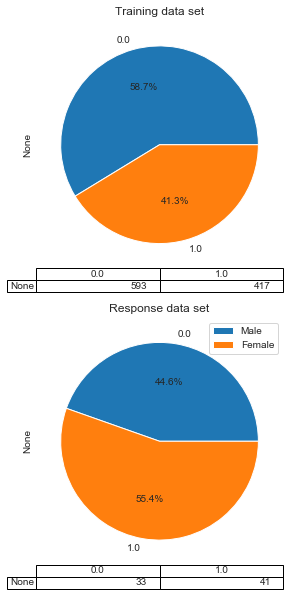

In [205]:
dpie_plotter("gender","Sex")

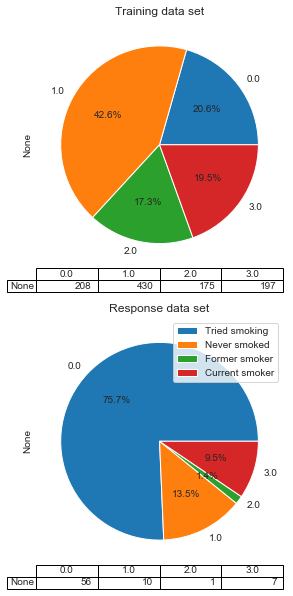

In [206]:
dpie_plotter("smoke","Do you smoke?")

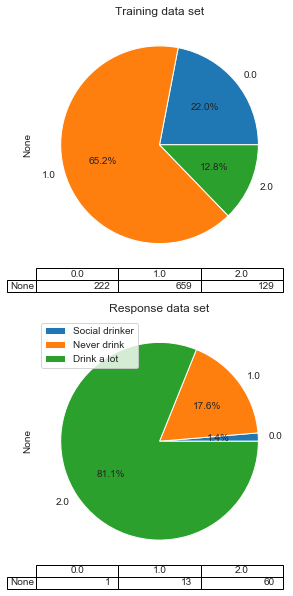

In [280]:
dpie_plotter("alcohol","Level of alcohol consumption.")

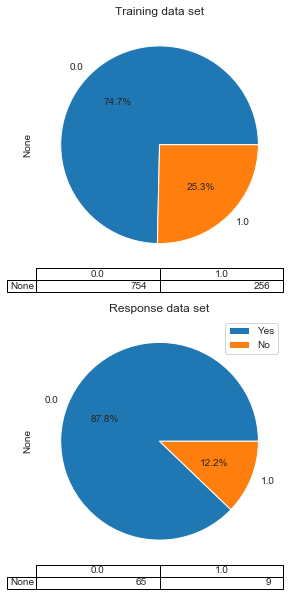

In [208]:
dpie_plotter("only_child","Are you the only child of your parents?")

Text(0, 0.5, 'probability')

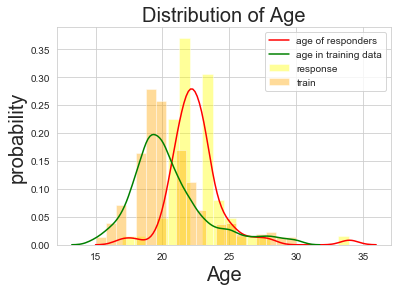

In [293]:
sns.distplot(df_r["Age"].values,bins=20,
              kde_kws={"color":"red","label":"age of responders"},
              hist_kws={"color":"yellow","label":"response"})
sns.distplot(df["Age"].values,bins=20,
              kde_kws={"color":"green","label":"age in training data"},
              hist_kws={"color":"orange","label":"train"})
plt.title("Distribution of Age",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("probability",fontsize=20)

Text(0, 0.5, 'probabilty')

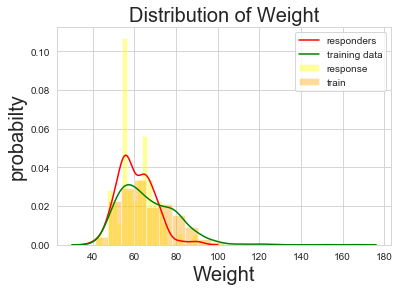

In [294]:
sns.distplot(df_r["Weight (in kgs)"].values,bins=20,
              kde_kws={"color":"red","label":"responders"},
              hist_kws={"color":"yellow","label":"response"})
sns.distplot(df["Weight"].values,bins=20,
              kde_kws={"color":"green","label":"training data"},
              hist_kws={"color":"orange","label":"train"})
plt.title("Distribution of Weight",fontsize=20)
plt.xlabel("Weight",fontsize=20)
plt.ylabel("probabilty",fontsize=20)

Text(0, 0.5, 'probabilty')

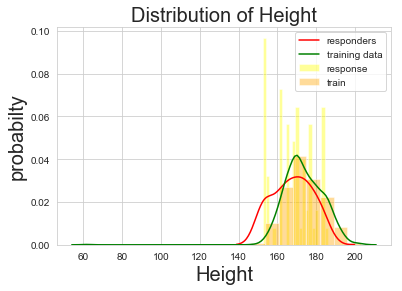

In [297]:
sns.distplot(h,bins=20,
              kde_kws={"color":"red","label":"responders"},
              hist_kws={"color":"yellow","label":"response"})
sns.distplot(df["Height"].values,bins=20,
              kde_kws={"color":"green","label":"training data"},
              hist_kws={"color":"orange","label":"train"})
plt.title("Distribution of Height",fontsize=20)
plt.xlabel("Height",fontsize=20)
plt.ylabel("probabilty",fontsize=20)

Text(0, 0.5, 'probabilty')

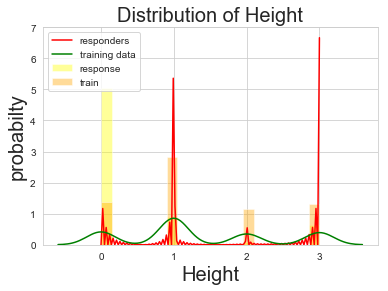

In [324]:
sns.distplot(df_r2["smoke"].values,bins=20,
              kde_kws={"color":"red","label":"responders"},
              hist_kws={"color":"yellow","label":"response"})
sns.distplot(df1["smoke"].values,bins=20,
              kde_kws={"color":"green","label":"training data"},
              hist_kws={"color":"orange","label":"train"})
plt.title("Distribution of smokers",fontsize=20)
#plt.xlabel("Height",fontsize=20)
#plt.ylabel("probabilty",fontsize=20)

Text(0.5, 1.0, 'Distribution of alcoholism')

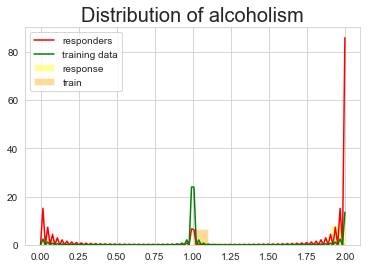

In [329]:
sns.distplot(df_r2["alcohol"].values,bins=20,
              kde_kws={"color":"red","label":"responders"},
              hist_kws={"color":"yellow","label":"response"})
sns.distplot(df1["alcohol"].values,bins=20,
              kde_kws={"color":"green","label":"training data"},
              hist_kws={"color":"orange","label":"train"})
plt.title("Distribution of alcoholism",fontsize=20)
#plt.xlabel("Height",fontsize=20)
#plt.ylabel("probabilty",fontsize=20)

In [332]:
df_pivot

,0,1,2,3,4
Dance,94.0,215.0,321.0,235.0,141.0
Shopping,103.0,197.0,252.0,230.0,226.0
Fun with friends,0.0,23.0,80.0,216.0,687.0
Parents' advice,35.0,118.0,455.0,344.0,56.0
Eating to survive,362.0,287.0,190.0,110.0,61.0
Pets,206.0,118.0,167.0,163.0,352.0
Darkness,358.0,301.0,165.0,106.0,78.0
Fear of public speaking,177.0,233.0,308.0,193.0,98.0
Economy Management,262.0,243.0,216.0,159.0,125.0
Healthy eating,81.0,137.0,504.0,239.0,46.0


In [330]:
mr2=[]
for i in np.arange(20):
     nm=df_r2.columns[i]
     m1=df_r2[nm].values
     mr2=np.append(mr2,counter(m1)) 
dfr_pivot=DataFrame(mr2.reshape(20,5),index=df1.columns[0:20])
dfr_pivot

,0,1,2,3,4
Dance,0.0,2.0,11.0,30.0,31.0
Shopping,0.0,9.0,16.0,24.0,25.0
Fun with friends,8.0,18.0,22.0,14.0,12.0
Parents' advice,5.0,12.0,23.0,21.0,13.0
Eating to survive,1.0,2.0,13.0,23.0,35.0
Pets,0.0,1.0,20.0,33.0,20.0
Darkness,15.0,6.0,22.0,22.0,9.0
Fear of public speaking,12.0,17.0,15.0,15.0,15.0
Economy Management,33.0,14.0,15.0,6.0,6.0
Healthy eating,12.0,14.0,20.0,18.0,10.0


In [339]:
df_pivot[["r1","r2","r3","r4","r5"]]=dfr_pivot[[0,1,2,3,4]]

In [340]:
df_pivot

,0,1,2,3,4,r1,r2,r3,r4,r5
Dance,94.0,215.0,321.0,235.0,141.0,0.0,2.0,11.0,30.0,31.0
Shopping,103.0,197.0,252.0,230.0,226.0,0.0,9.0,16.0,24.0,25.0
Fun with friends,0.0,23.0,80.0,216.0,687.0,8.0,18.0,22.0,14.0,12.0
Parents' advice,35.0,118.0,455.0,344.0,56.0,5.0,12.0,23.0,21.0,13.0
Eating to survive,362.0,287.0,190.0,110.0,61.0,1.0,2.0,13.0,23.0,35.0
Pets,206.0,118.0,167.0,163.0,352.0,0.0,1.0,20.0,33.0,20.0
Darkness,358.0,301.0,165.0,106.0,78.0,15.0,6.0,22.0,22.0,9.0
Fear of public speaking,177.0,233.0,308.0,193.0,98.0,12.0,17.0,15.0,15.0,15.0
Economy Management,262.0,243.0,216.0,159.0,125.0,33.0,14.0,15.0,6.0,6.0
Healthy eating,81.0,137.0,504.0,239.0,46.0,12.0,14.0,20.0,18.0,10.0
